
#Linear Regression with Python

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from pyspark.sql import SparkSession

#assigning linear_model to a variable
rgr = linear_model.LinearRegression()

spark = SparkSession.builder.appName('lr_example').getOrCreate()


In [0]:
df = spark.read.table("works.default.ecommerce_customers")
df.show()
df = df.toPandas()

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37.110597442120856|   4.104543202376424| 487.54750486747207|
|riverarebecca@gma...|1414 David Throug...|   

In [0]:
# Selecting some randoms columns for regression
cdf = df[["Avg Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]
cdf.head(3)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


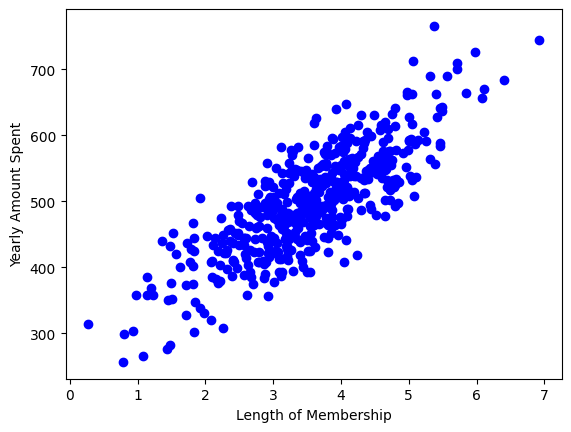

In [0]:
plt.scatter(cdf[["Length of Membership"]], cdf[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

In reality, there are **multiple variables** that predict the Yearly Amount Spent. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting Yearly Amount Spent using Avg Session Length, Time on App, Time on Website and Length of Membership. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

## Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

In [0]:
msk = np.random.rand(len(df)) < 0.8

In [0]:
train  = cdf[msk]
test = cdf[~msk]

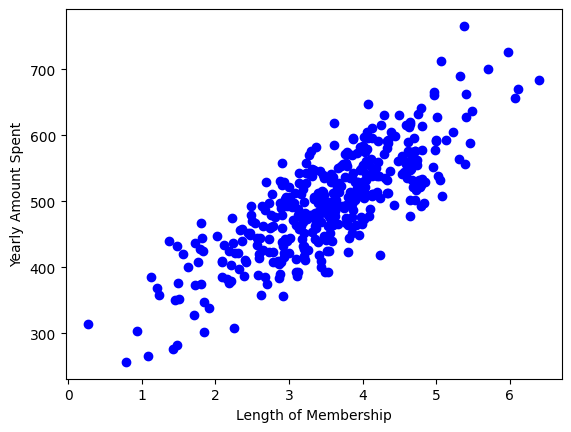

In [0]:

#### Train data distribution
plt.scatter(train[["Length of Membership"]], train[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

In [0]:
input_cols = ["Avg Session Length","Time on App","Time on Website","Length of Membership"]

In [0]:
X = np.asanyarray(train[input_cols])
y = np.asanyarray(train[["Yearly Amount Spent"]])

In [0]:
rgr.fit(X,y)
print('Coefficients :', rgr.coef_)

Coefficients : [[25.73700025 38.57031604  0.38982604 61.38836717]]


**Coefficient** and **Intercept** , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

## Prediction

In [0]:
y_hat = rgr.predict(test[input_cols])
x = np.asanyarray(test[input_cols])
y = np.asanyarray(test[['Yearly Amount Spent']])

print('Residual sum of squares: %.2f'% np.mean((y_hat-y)**2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % rgr.score(x, y))

Residual sum of squares: 116.44
Variance score: 0.98


**explained variance regression score:**
If `Y_hat` is the estimated target output, `y`the corresponding (correct) target output, and `Var` is Variance, the square of the standard deviation.The best possible score is 1.0 , lower values are worse.

# Linear Regression with Pyspark

In [0]:
data = spark.read.table('works.default.ecommerce_customers')
display(data)

Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.49726772511229,12.65565114916675,39.57766801952616,4.0826206329529615,587.9510539684005
hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.92627202636016,11.109460728682564,37.268958868297744,2.66403418213262,392.2049334443264
pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC 99414-7564",Bisque,33.000914755642675,11.330278057777512,37.110597442120856,4.104543202376424,487.54750486747207
riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.30555662975554,13.717513665142507,36.72128267790313,3.120178782748092,581.8523440352177
mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 37242-1057",MediumAquaMarine,33.33067252364639,12.795188551078114,37.53665330059473,4.446308318351434,599.4060920457634
alvareznancy@lucas.biz,"645 Martha Park Apt. 611Jeffreychester, MN 67218-7250",FloralWhite,33.871037879341976,12.026925339755056,34.47687762925054,5.493507201364199,637.102447915074
katherine20@yahoo.com,"68388 Reyes Lights Suite 692Josephbury, WV 92213-0247",DarkSlateBlue,32.02159550138701,11.366348309710526,36.68377615286961,4.685017246570912,521.5721747578274
awatkins@yahoo.com,Unit 6538 Box 8980DPO AP 09026-4941,Aqua,32.739142938380326,12.35195897300293,37.37335885854755,4.4342734348999375,549.9041461052942
vchurch@walter-martinez.com,"860 Lee KeyWest Debra, SD 97450-0495",Salmon,33.98777289568564,13.386235275676436,37.534497341555735,3.2734335777477144,570.2004089636196
bonnie69@lin.biz,"PSC 2734, Box 5255APO AA 98456-7482",Brown,31.936548618448917,11.814128294972196,37.14516822352819,3.202806071553459,427.1993848953282


In [0]:
data.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [0]:
data.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [0]:
assembler = VectorAssembler(
    inputCols=["Avg Session Length", "Time on App", 
               "Time on Website","Length of Membership"],
    outputCol="features")


In [0]:
output = assembler.transform(data)
output.select("features").show(3)


In [0]:
final_data = output.select("features",'Yearly Amount Spent')

In [0]:

# Pass in the split between training/test as a list.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [0]:
train_data,test_data = final_data.randomSplit([0.7,0.3])


In [0]:
lr = LinearRegression(labelCol='Yearly Amount Spent')


In [0]:
lrModel = lr.fit(train_data,)


In [0]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

In [0]:
test_results = lrModel.evaluate(test_data)


In [0]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))


In [0]:
unlabeled_data = test_data.select('features')


In [0]:
predictions = lrModel.transform(unlabeled_data)


In [0]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))